In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from agents import FrustratedRescorlaAgent
from gym import SimpleBanditTask

import sys
sys.path.append("C:\ZSOMBI\OneDrive\PoPy")


from popy.io_tools import get_behavior
from popy.behavior_data_tools import add_value_function, add_phase_info, drop_time_fields
from popy.plotting_tools import show_target_selection

import pandas as pd

In [91]:
# best params
alpha = 0.5
beta = 30
v0 = .2

# env_params
N = 50000
trials_per_block = 40

In [92]:
# environment
env = SimpleBanditTask(N_TRIALS = N, BLOCK_LEN=trials_per_block, BLOCK_TRANSITION_LEN=5)

# agent
agent = FrustratedRescorlaAgent()
agent.ALPHA = alpha
agent.BETA = beta
agent.V_SHIFT = v0

# simulate trials
reward = 0
for i in range(N):
    action = agent.act(reward)
    reward = env.step(action)

# extract info (session data)
session_data = env.extract_info()

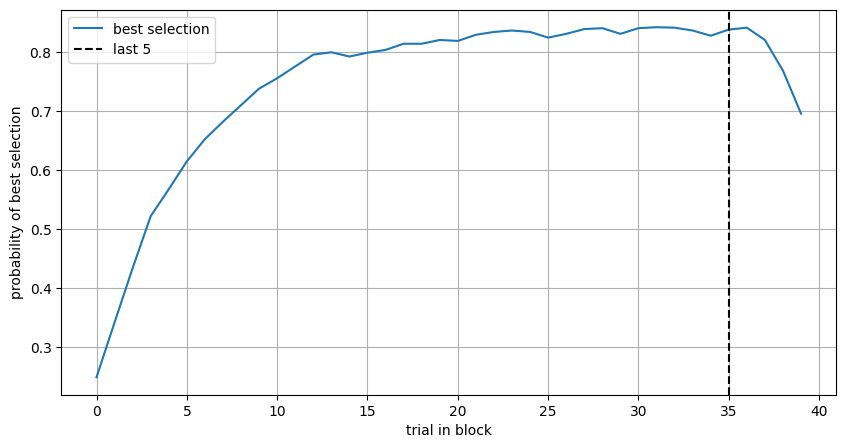

In [93]:
# add best target column
session_data['best_selection'] = session_data.target == session_data.best_target

# group by block
session_data_best_sel = session_data.groupby('trial_in_block').mean().reset_index()
probab_best_sel = session_data_best_sel.best_selection.values

# plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(probab_best_sel, label='best selection')
ax.set_xlabel('trial in block')
ax.set_ylabel('probability of best selection')
ax.axvline(35, linestyle='--', color='black', label='last 5')
ax.legend()
ax.grid()
plt.show()


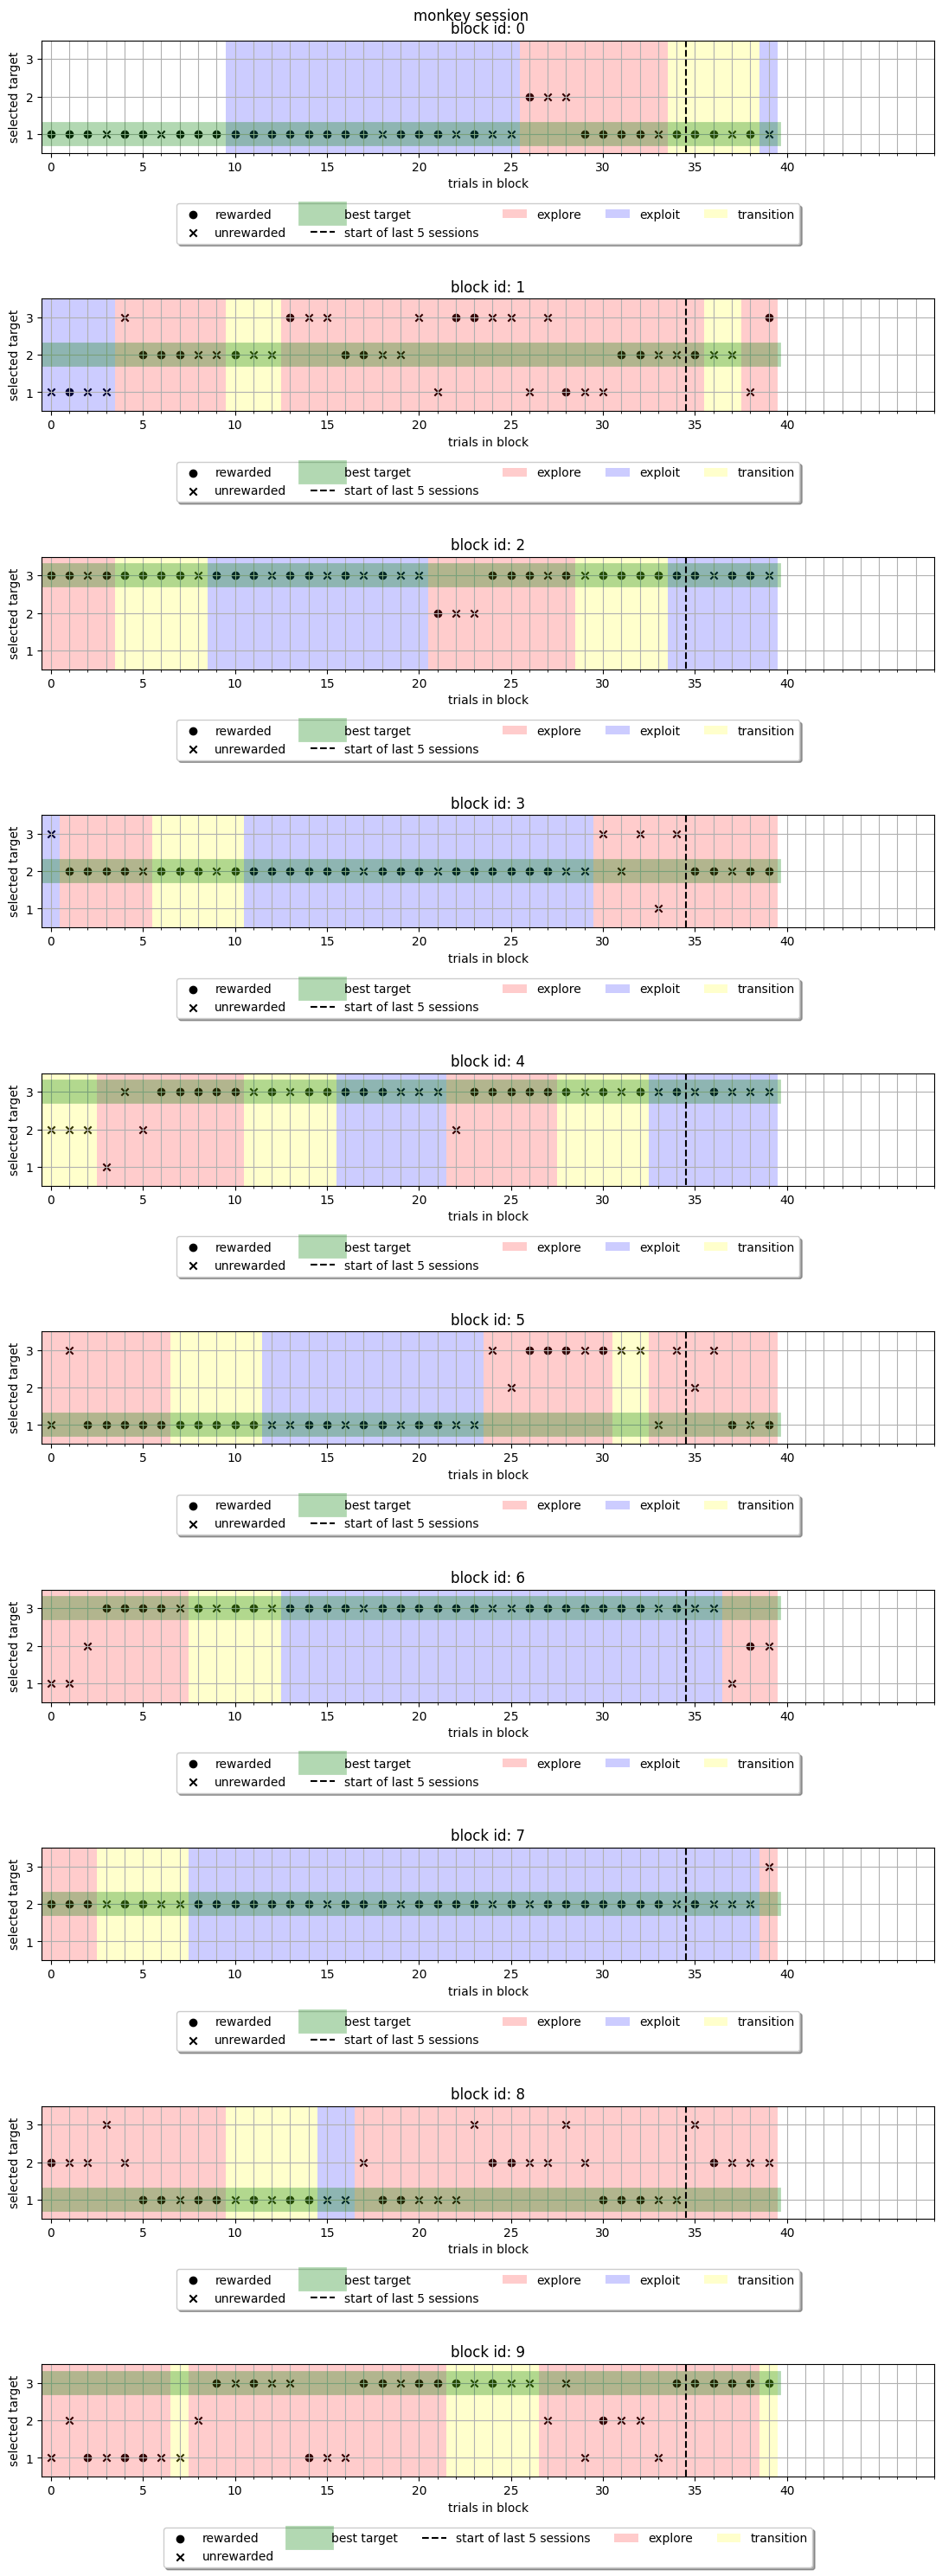

In [94]:
session_data.best_target = session_data.best_target + 1
session_data.target = session_data.target + 1

# target selection
show_target_selection(session_data[:400], title='monkey session')